<h1>Data Cleaning</h1>

<h4>In the initial phase the project, i conducted a thorough data cleaning process on the dataset to ensure its reliability and suitability for analysis.</h4>

In [15]:
import pandas as pd
import seaborn as sns

In [16]:

input_csv_file = 'crime_data.csv'
crimes = pd.read_csv(input_csv_file)
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


<h5>1. Missing values</h5>

In [17]:
missing_values = crimes.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
dtype: int64


<b>We can see some missing values in 3 columns. I will visualize them on a heatmap making them easier to see</b>

<Axes: >

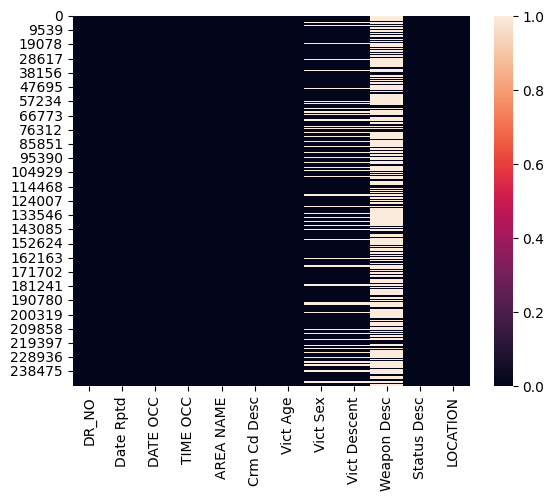

In [18]:
sns.heatmap(missing_values)

<b> The Weapon Desc column so many missing values that i'm going to drop it entierely </b>

In [19]:
crimes.drop('Weapon Desc', axis=1, inplace=True)

<b> For the Vict sex and Vict Descent colums i will use the mode to fill in missing values</b>

In [20]:
crimes['Vict Sex'].fillna(crimes['Vict Sex'].mode()[0], inplace=True)
crimes['Vict Descent'].fillna(crimes['Vict Descent'].mode()[0], inplace=True)

<h5> 2. Data Type Conversion </h5>

<b>

In [21]:
print(crimes.dtypes)

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC         int64
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Status Desc     object
LOCATION        object
dtype: object


<b>I will convert 'Date Rptd' , 'DATE OCC,' and 'TIME OCC' to datetime objects</b>

In [22]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])


<b> For the conversion to work properly i must first format the values in "TIME OCC"</h1>

In [23]:
def format_time(hours):
    hours_str = str(hours)
    
    hours_str = hours_str.zfill(4)

    formatted_time = hours_str[:2] + ":" + hours_str[2:]

    return formatted_time

In [24]:
formatted_time_array = [format_time(hours) for hours in crimes['TIME OCC']]
crimes['TIME OCC'] = formatted_time_array

<b>And now finish the conversion</b>

In [25]:
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H:%M')

<h5>3. Duplicates</h5>

In [26]:
print(crimes.duplicated().sum())

0


<h5>4. Saving the changes to a file</b>

In [27]:

output_csv_file = 'cleaned_crime_data.csv'
crimes.to_csv(output_csv_file, index=False)